In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../dataset/dataset_baru.csv')


In [4]:
fitur = ['curah_hujan_mm',
         'kemiringan_persen','banjir_historis']

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[fitur])
print(data_scaled)


[[0.01251564 0.26666667 0.4       ]
 [0.39549437 0.4        0.6       ]
 [0.73842303 1.         0.4       ]
 ...
 [0.85481852 1.         0.        ]
 [0.91489362 0.26666667 0.6       ]
 [0.78723404 0.93333333 0.4       ]]


In [6]:
# === 4. Jalankan K-Means ===
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
data['klaster'] = kmeans.fit_predict(data_scaled)


In [7]:
# === 5. Pemetaan label klaster ke zonasi ===
mapping = {0: 'Rendah', 1: 'Sedang', 2: 'Tinggi'}

      id  latitude   longitude  curah_hujan_mm  kemiringan_persen  \
0      1 -0.842509  123.067926            2411                  4   
1      2 -0.830986  123.061444            2717                  6   
2      3 -0.835360  123.052381            2991                 15   
3      4 -0.838027  123.072552            2615                  2   
4      5 -0.846880  123.067389            2738                 11   
..   ...       ...         ...             ...                ...   
495  496 -0.842933  123.043663            3149                  0   
496  497 -0.838327  123.076693            2755                  5   
497  498 -0.848445  123.045473            3084                 15   
498  499 -0.830512  123.078009            3132                  4   
499  500 -0.830276  123.057840            3030                 14   

     banjir_historis  klaster klaster_banjir  
0                  2        0         Rendah  
1                  3        0         Rendah  
2                  2        2 

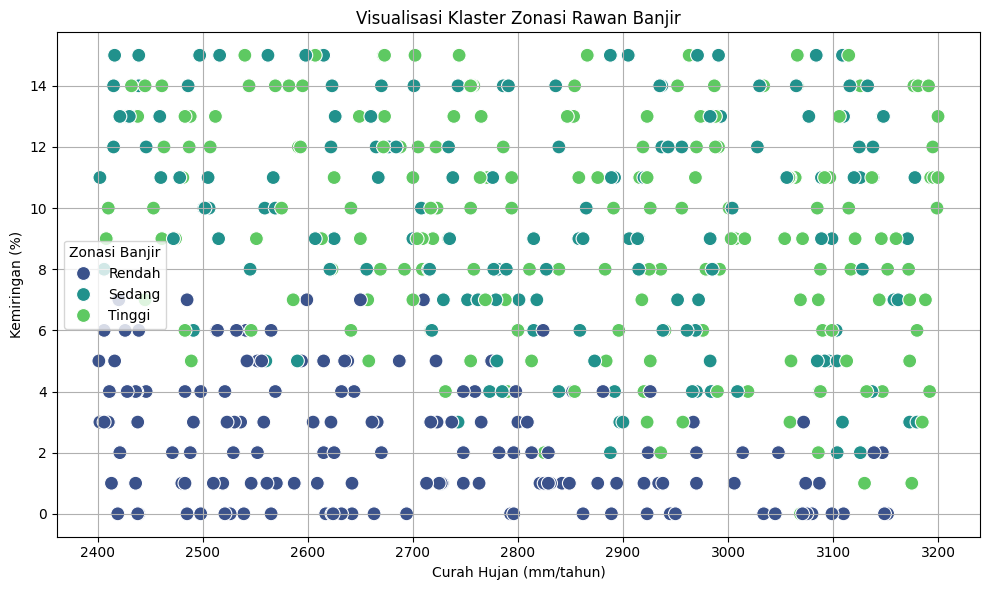

In [8]:
# Urutkan berdasarkan elevasi rata-rata per klaster (agar labelnya masuk akal)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=fitur)
order = centers['curah_hujan_mm'].argsort().values
label_map = {old: mapping[new] for new, old in enumerate(order)}
data['klaster_banjir'] = data['klaster'].map(label_map)
print(data)
# === 6. Simpan hasilnya ke CSV ===
# data.to_csv("hasil_klaster_banjir_terbaru.csv", index=False)
# === 7. Visualisasi ===
# Buat ukuran plot besar
plt.figure(figsize=(10, 6))
# Plot scatter dengan warna sesuai klaster banjir
sns.scatterplot(
    data=data,
    x='curah_hujan_mm',
    y='kemiringan_persen',
    hue='klaster_banjir',
    palette='viridis',
    s=100
)

plt.title("Visualisasi Klaster Zonasi Rawan Banjir")
plt.xlabel("Curah Hujan (mm/tahun)")
plt.ylabel("Kemiringan (%)")
plt.legend(title="Zonasi Banjir")
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
claster = pd.read_csv('hasil_klaster_banjir.csv')
print(claster)

      id  latitude   longitude  elevation_m  curah_hujan_mm  jarak_sungai_m  \
0      1 -0.842509  123.067926           76            2915              58   
1      2 -0.830986  123.061444           41            3131              51   
2      3 -0.835360  123.052381           91            2763             175   
3      4 -0.838027  123.072552          109            2781              91   
4      5 -0.846880  123.067389          117            2931             300   
..   ...       ...         ...          ...             ...             ...   
495  496 -0.842933  123.043663           87            2500             206   
496  497 -0.838327  123.076693           90            2643             276   
497  498 -0.848445  123.045473           53            2889             277   
498  499 -0.830512  123.078009           49            2411              83   
499  500 -0.830276  123.057840           66            2638              17   

     kemiringan_persen     landuse  banjir_historis